In [ ]:
!pip install fbprophet
from fbprophet import Prophet

In [47]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [48]:
#Question: What should be the total brazilian soybeans, 
#soybean_meal, and corn export forecasts, in tons, 
#for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

In [49]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]
dado_groups = dado.groupby([dado.index.year,dado.index.month,dado.type, dado.product]).sum()
dado_groups= dado_groups[dado_groups.index.get_level_values(2)=="Export"]

In [50]:
corn

tons           usd
date date type   product                           
1997 1    Export corn      170407.730  2.062530e+07
     2    Export corn       96868.464  1.313796e+07
     3    Export corn       48452.425  6.680216e+06
     4    Export corn       30821.130  4.059595e+06
     5    Export corn        1855.510  1.549524e+06
...                               ...           ...
2019 8    Export corn     7089960.784  1.206579e+09
     9    Export corn     6363331.668  1.051272e+09
     10   Export corn     5976773.949  9.852824e+08
     11   Export corn     4064252.669  6.899324e+08
     12   Export corn     4032792.141  7.003695e+08

[276 rows x 2 columns]

In [51]:
corn = dado_groups[dado_groups.index.get_level_values(3)=="corn"]
soybean_meal = dado_groups[dado_groups.index.get_level_values(3)=="soybean_meal"]
soybeans = dado_groups[dado_groups.index.get_level_values(3)=="soybeans"]

tons_corn = corn.groupby(corn.index.get_level_values(0)).sum().tons/1000000
tons_soybean_meal = soybean_meal.groupby(soybean_meal.index.get_level_values(0)).sum().tons/1000000
tons_soybeans = soybeans.groupby(soybeans.index.get_level_values(0)).sum().tons/1000000

In [52]:
anos=tons_corn.index
ds=[]
for i in range(anos[0],anos[-1]+12):
    ds.append(dt.datetime(i,1,1))

In [53]:
y = pd.DataFrame({'ds':ds[:-19],'y':tons_corn.values[:-8]}, index=pd.to_datetime(ds[:-19]).year)
y_test = pd.DataFrame({'ds':ds[:-11],'y':tons_corn.values}, index=pd.to_datetime(ds[:-11]).year)

In [54]:
y

,ds,y
1997,1997-01-01,0.356895
1998,1998-01-01,0.006034
1999,1999-01-01,0.005321
2000,2000-01-01,0.005555
2001,2001-01-01,5.410199
2002,2002-01-01,2.727390
2003,2003-01-01,3.509735
2004,2004-01-01,4.892188
2005,2005-01-01,1.069452
2006,2006-01-01,3.936310


In [55]:
y_test

,ds,y
1997,1997-01-01,0.356895
1998,1998-01-01,0.006034
1999,1999-01-01,0.005321
2000,2000-01-01,0.005555
2001,2001-01-01,5.410199
2002,2002-01-01,2.727390
2003,2003-01-01,3.509735
2004,2004-01-01,4.892188
2005,2005-01-01,1.069452
2006,2006-01-01,3.936310


# SOJA: Conjunto de treinamento

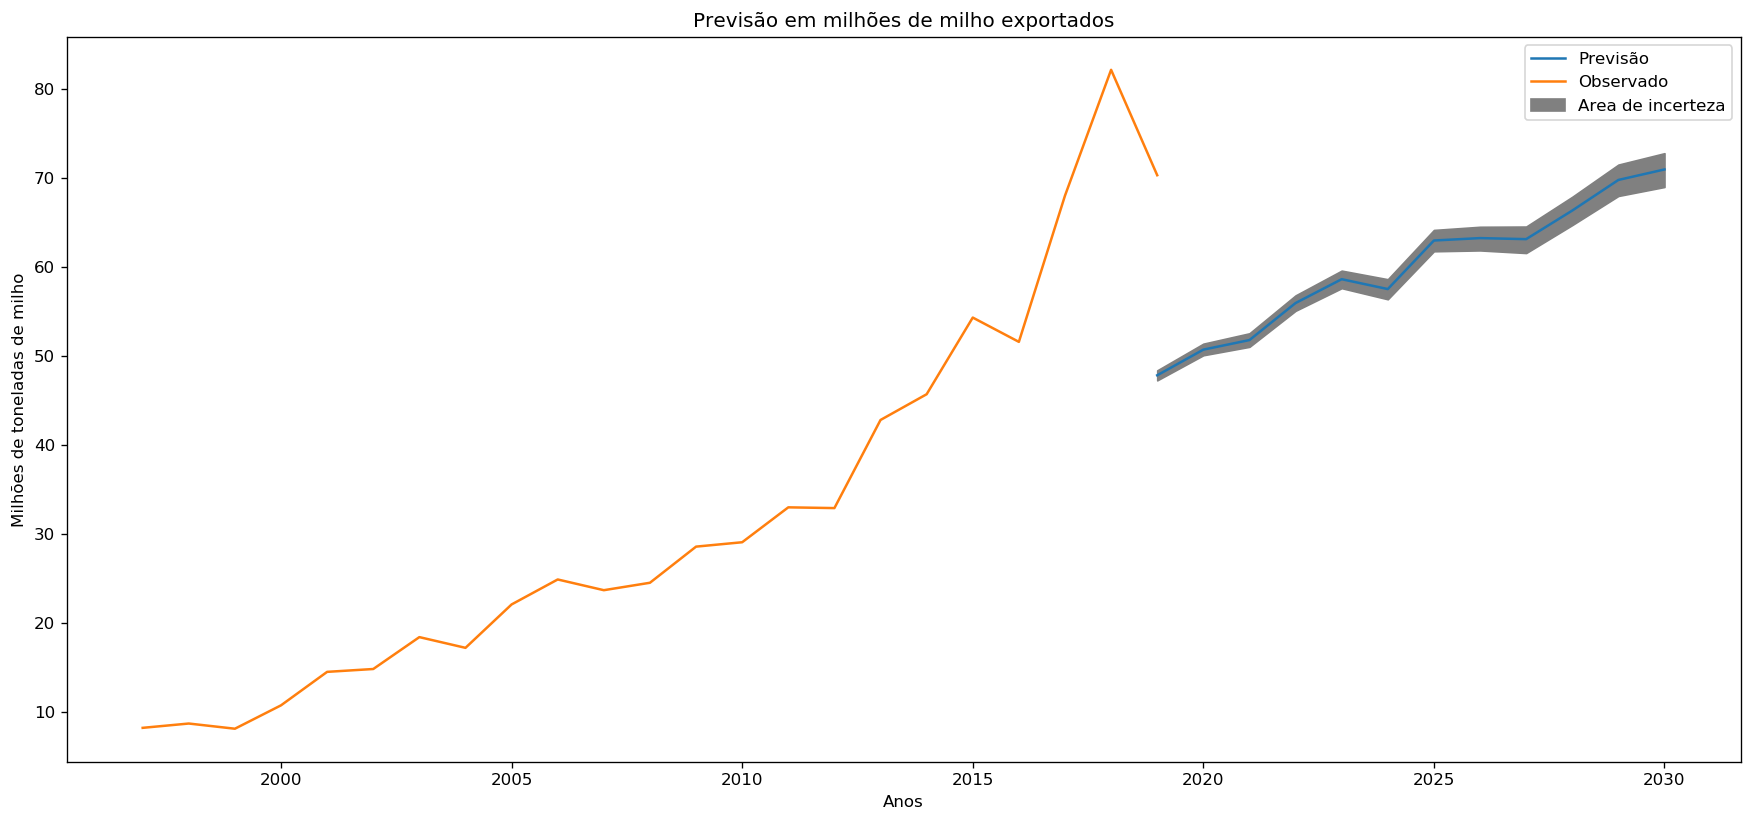

In [56]:
y = pd.DataFrame({'ds':ds[:-19],'y':tons_soybeans.values[:-8]}, index=pd.to_datetime(ds[:-19]).year)
y_test = pd.DataFrame({'ds':ds[:-11],'y':tons_soybeans.values}, index=pd.to_datetime(ds[:-11]).year)
m = Prophet(weekly_seasonality=True,daily_seasonality=True, n_changepoints=11)
m.fit(y)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Previsão em milhões de milho exportados')
plt.ylabel('Milhões de toneladas de milho')
plt.xlabel('Anos')

plt.legend()
plt.show()

# SOJA: Conjunto de teste

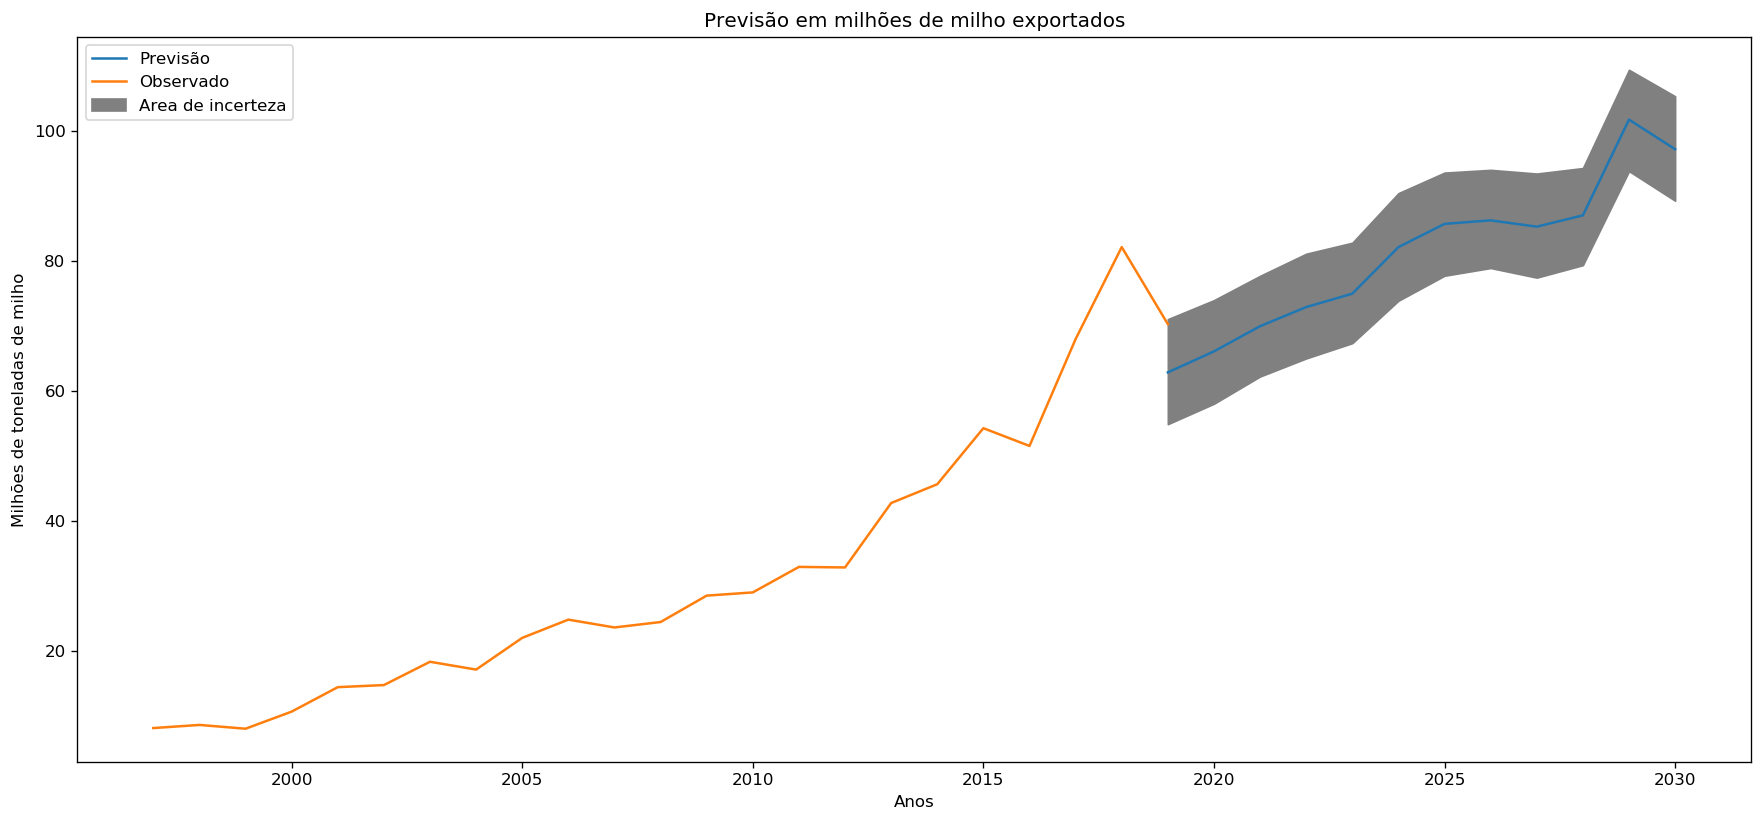

In [58]:
y = pd.DataFrame({'ds':ds[:-19],'y':tons_soybeans.values[:-8]}, index=pd.to_datetime(ds[:-19]).year)
y_test = pd.DataFrame({'ds':ds[:-11],'y':tons_soybeans.values}, index=pd.to_datetime(ds[:-11]).year)
m = Prophet(weekly_seasonality=True,daily_seasonality=True, n_changepoints=11)
m.fit(y_test)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Previsão em milhões de milho exportados')
plt.ylabel('Milhões de toneladas de milho')
plt.xlabel('Anos')

plt.legend()
plt.show()

# FARELO DE SOJA: Conjunto de treinamento

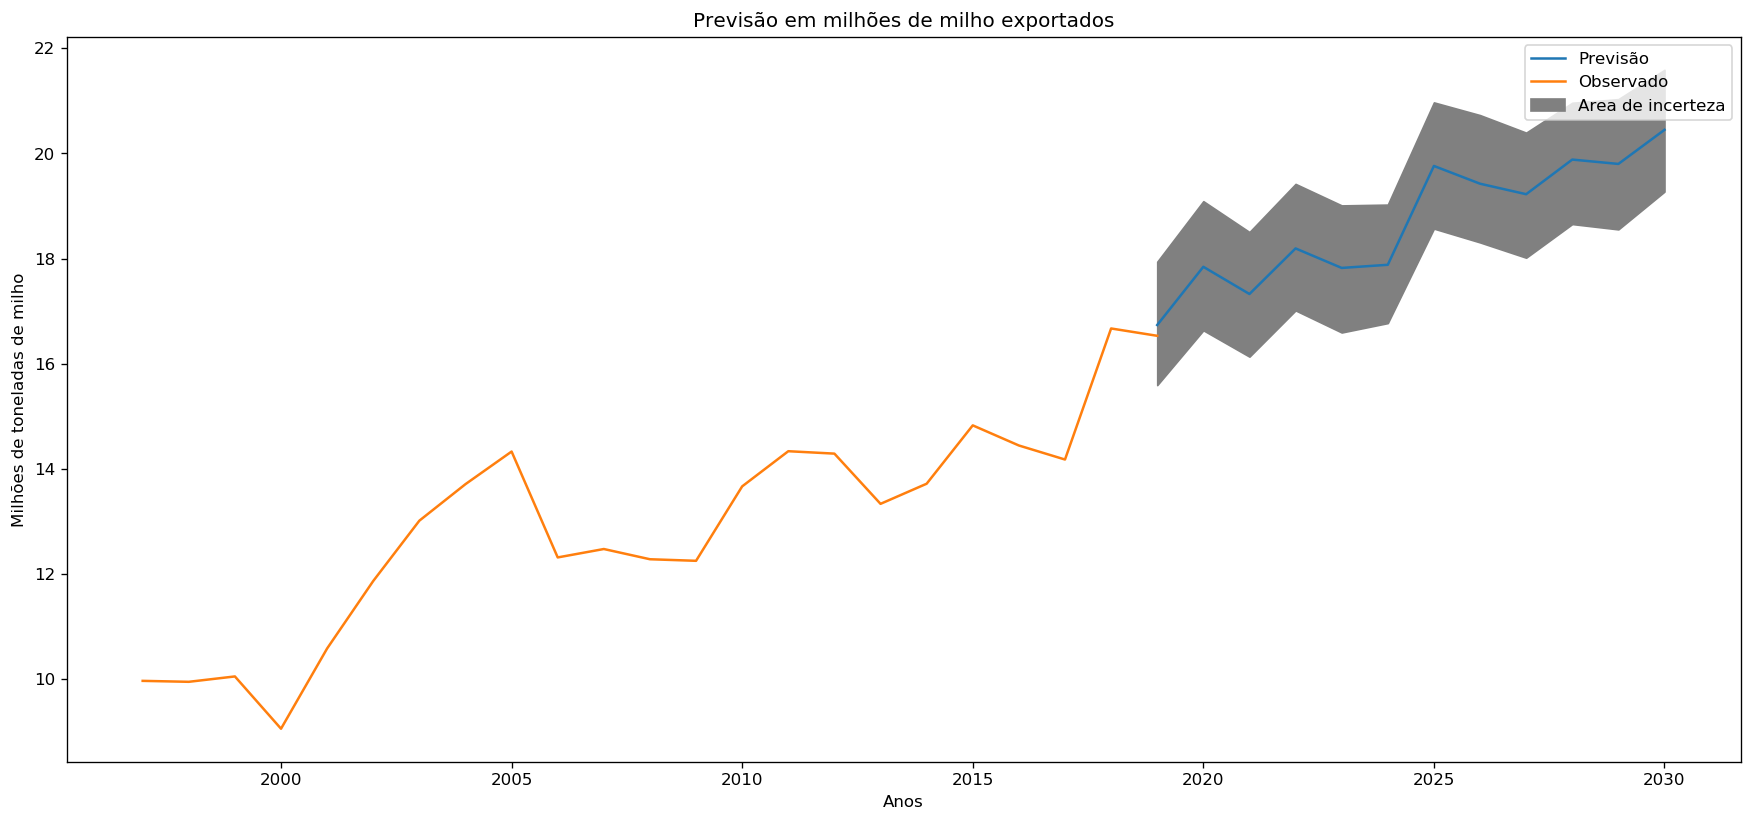

In [59]:
y = pd.DataFrame({'ds':ds[:-19],'y':tons_soybean_meal.values[:-8]}, index=pd.to_datetime(ds[:-19]).year)
y_test = pd.DataFrame({'ds':ds[:-11],'y':tons_soybean_meal.values}, index=pd.to_datetime(ds[:-11]).year)
m = Prophet(weekly_seasonality=True,daily_seasonality=True, n_changepoints=11)
m.fit(y)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Previsão em milhões de milho exportados')
plt.ylabel('Milhões de toneladas de milho')
plt.xlabel('Anos')

plt.legend()
plt.show()

# FARELO DE SOJA: Conjunto de teste

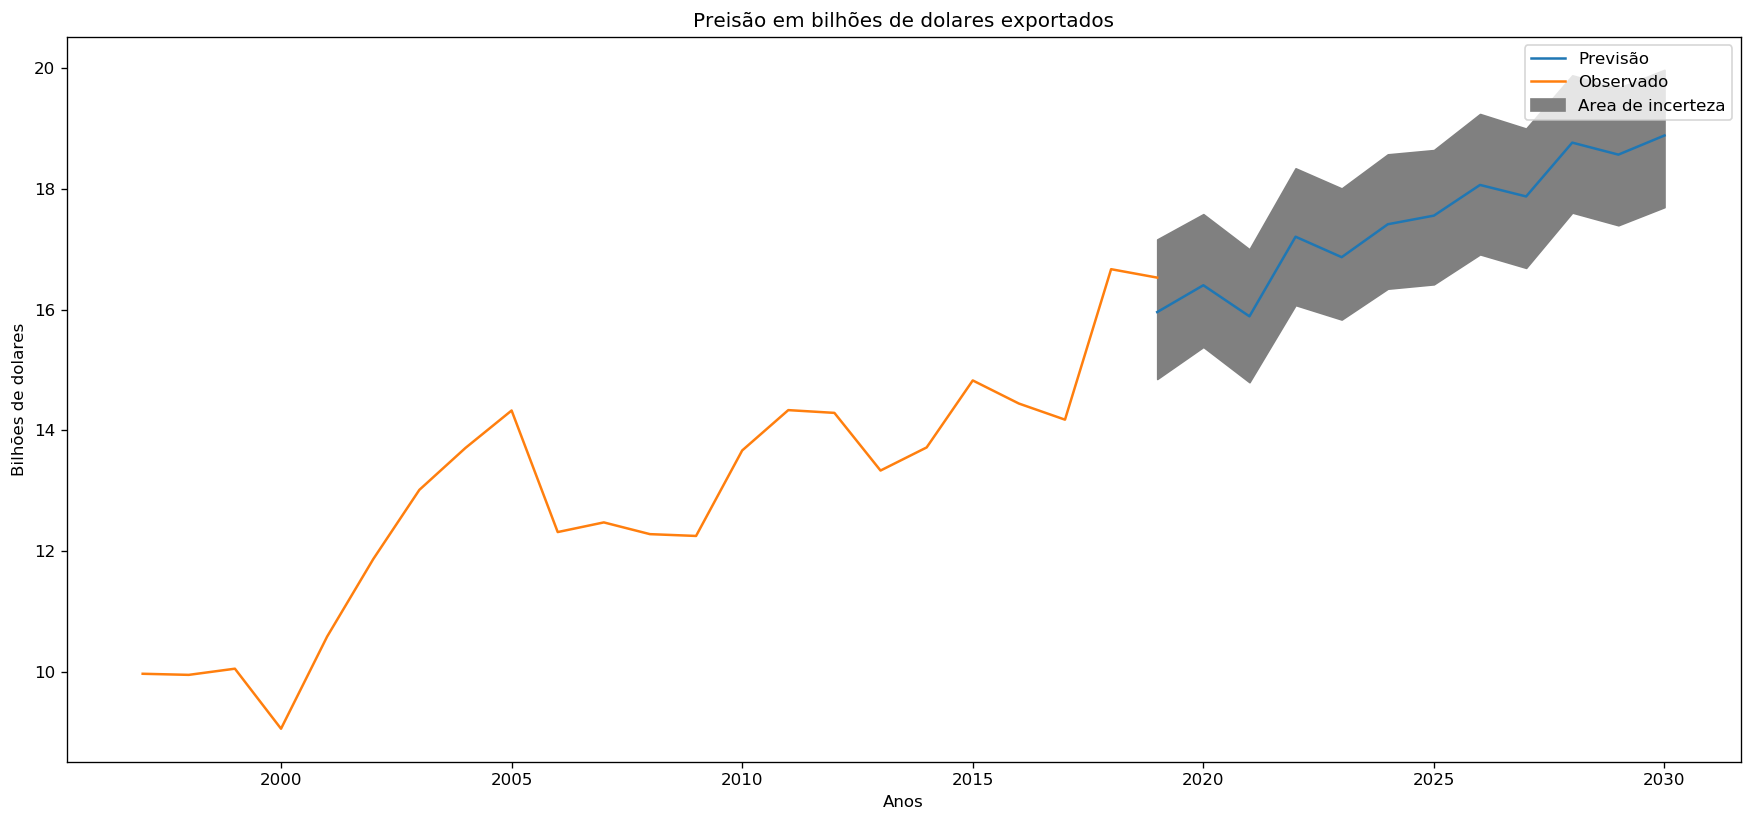

In [61]:
y = pd.DataFrame({'ds':ds[:-19],'y':tons_soybean_meal.values[:-8]}, index=pd.to_datetime(ds[:-19]).year)
y_test = pd.DataFrame({'ds':ds[:-11],'y':tons_soybean_meal.values}, index=pd.to_datetime(ds[:-11]).year)
m = Prophet(weekly_seasonality=True,daily_seasonality=True, n_changepoints=11)
m.fit(y_test)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Preisão em bilhões de dolares exportados')
plt.ylabel('Bilhões de dolares')
plt.xlabel('Anos')

plt.legend()
plt.show()

# MILHO: Conjunto de treinamento

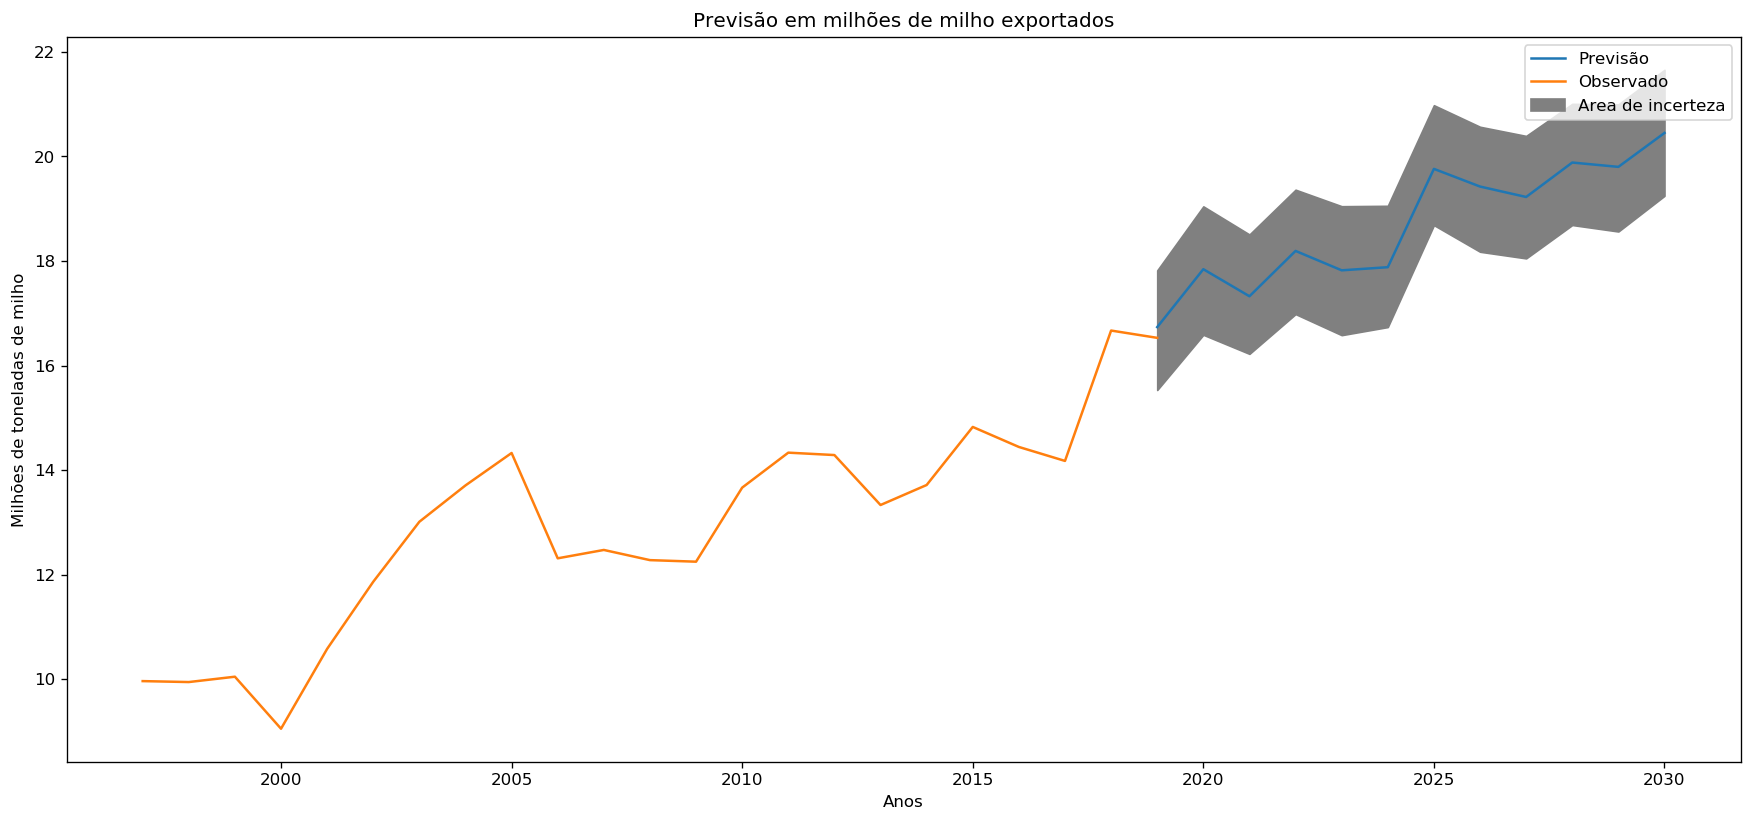

In [62]:
m = Prophet(weekly_seasonality=True,daily_seasonality=True, n_changepoints=11)
m.fit(y)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Previsão em milhões de milho exportados')
plt.ylabel('Milhões de toneladas de milho')
plt.xlabel('Anos')

plt.legend()
plt.show()

# MILHO: Conjunto de teste

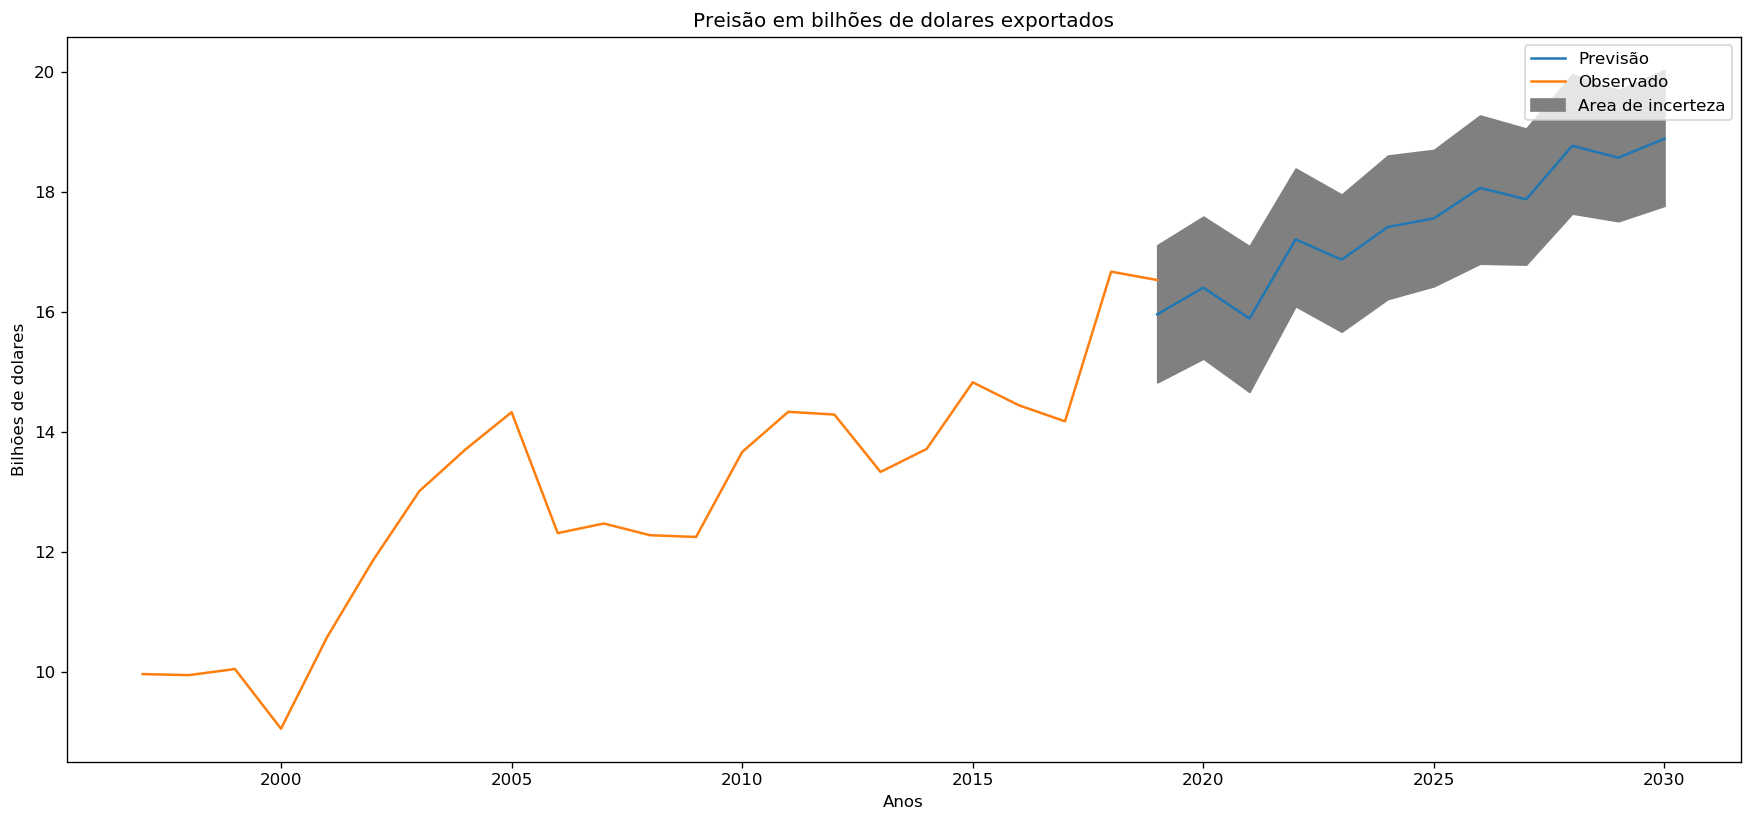

In [63]:
m = Prophet(weekly_seasonality=True,daily_seasonality=True, n_changepoints=11)
m.fit(y_test)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Preisão em bilhões de dolares exportados')
plt.ylabel('Bilhões de dolares')
plt.xlabel('Anos')

plt.legend()
plt.show()